In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
plt.style.use('bmh')
import tensorflow as tf

/home/atom16/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_csv('trained_consolidated_merged_filtered_data_0314_v2.csv')
X_train, X_test, y_train, y_test = train_test_split(data, data['Requisition_levels_cleared_category'], test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

/home/atom16/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
X_train.head()

,Unnamed: 0,REQUISITION_CLUSTER_1,REQUISITION_CLUSTER_2,REQUISITION_CLUSTER_3,REQUISITION_CLUSTER_4,REQUISITION_CLUSTER_5,Matching_Designation,Mandatory_Job_Cluster,Overlap_Mandatory_Cluster,Overlap_Cluster_1,...,Requisition_maxexp,RequisitionCity,OrganizationID,Req_Seniority_Level,Cand_exp,Candidate_Seniority_Level,CandidateCity,Requisition_levels_cleared_category,CandidateCityID,RequisitionCityID
24182,24182,42.0,51.0,23.0,NaN,NaN,1,42.0,1,23.0,...,5.0,593,69,0,52,0,2484,2,2484.0,593.0
197630,197640,NaN,NaN,NaN,NaN,NaN,0,NaN,1,23.0,...,5.0,1489,69,2,8,0,824,1,824.0,1489.0
100792,100792,21.0,79.0,NaN,NaN,NaN,0,NaN,1,23.0,...,5.0,1521,69,0,20,0,1512,2,1512.0,1521.0
181855,181855,64.0,76.0,17.0,NaN,NaN,0,64.0,0,23.0,...,10.0,1489,69,2,30,2,1495,1,1495.0,1489.0
29551,29551,77.0,47.0,NaN,NaN,NaN,1,77.0,1,77.0,...,6.0,146,69,2,117,2,6,2,6.0,146.0


In [65]:
X_test.shape

(46384, 27)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139149 entries, 24182 to 145957
Data columns (total 30 columns):
Unnamed: 0                             139149 non-null int64
REQUISITION_CLUSTER_1                  74885 non-null float64
REQUISITION_CLUSTER_2                  37759 non-null float64
REQUISITION_CLUSTER_3                  11912 non-null float64
REQUISITION_CLUSTER_4                  4475 non-null float64
REQUISITION_CLUSTER_5                  1792 non-null float64
Matching_Designation                   139149 non-null int64
Mandatory_Job_Cluster                  32851 non-null float64
Overlap_Mandatory_Cluster              139149 non-null int64
Overlap_Cluster_1                      126555 non-null float64
Overlap_Cluster_2                      110079 non-null float64
CANDIDATE_CLUSTER_1                    113211 non-null float64
CANDIDATE_CLUSTER_2                    94391 non-null float64
CANDIDATE_CLUSTER_3                    75371 non-null float64
CANDIDATE_CLUSTER_4

In [6]:
# Checking datatypes
g = X_train.columns.to_series().groupby(X_train.dtypes).groups
g

{dtype('int64'): Index([u'Unnamed: 0', u'Matching_Designation', u'Overlap_Mandatory_Cluster',
        u'RequisitionID', u'CandidateID', u'requisition_levels',
        u'OrganizationID', u'Req_Seniority_Level', u'Cand_exp',
        u'Candidate_Seniority_Level', u'Requisition_levels_cleared_category'],
       dtype='object'),
 dtype('float64'): Index([u'REQUISITION_CLUSTER_1', u'REQUISITION_CLUSTER_2',
        u'REQUISITION_CLUSTER_3', u'REQUISITION_CLUSTER_4',
        u'REQUISITION_CLUSTER_5', u'Mandatory_Job_Cluster',
        u'Overlap_Cluster_1', u'Overlap_Cluster_2', u'CANDIDATE_CLUSTER_1',
        u'CANDIDATE_CLUSTER_2', u'CANDIDATE_CLUSTER_3', u'CANDIDATE_CLUSTER_4',
        u'CANDIDATE_CLUSTER_5', u'Requisition_minexp', u'Requisition_maxexp',
        u'CandidateCityID', u'RequisitionCityID'],
       dtype='object'),
 dtype('O'): Index([u'RequisitionCity', u'CandidateCity'], dtype='object')}

In [7]:
# Removing the unnamed column
# Also removing CandidateCity and RequisitionCity as these have some values as strings, and some as floats
# We'll keep CandidateCityID and RequisitionCityID as they serve the same purpose
X_train.drop(['Unnamed: 0', 'CandidateCity', 'RequisitionCity'], inplace = True, axis = 1)
X_val.drop(['Unnamed: 0', 'CandidateCity', 'RequisitionCity'], inplace = True, axis = 1)
X_test.drop(['Unnamed: 0', 'CandidateCity', 'RequisitionCity'], inplace = True, axis = 1)

/home/atom16/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
X_train.nunique()

REQUISITION_CLUSTER_1                     60
REQUISITION_CLUSTER_2                     59
REQUISITION_CLUSTER_3                     53
REQUISITION_CLUSTER_4                     45
REQUISITION_CLUSTER_5                     38
Matching_Designation                       2
Mandatory_Job_Cluster                     46
Overlap_Mandatory_Cluster                  2
Overlap_Cluster_1                         84
Overlap_Cluster_2                         86
CANDIDATE_CLUSTER_1                       82
CANDIDATE_CLUSTER_2                       85
CANDIDATE_CLUSTER_3                       82
CANDIDATE_CLUSTER_4                       83
CANDIDATE_CLUSTER_5                       83
RequisitionID                          11979
CandidateID                            61052
requisition_levels                         8
Requisition_minexp                        21
Requisition_maxexp                        28
OrganizationID                            13
Req_Seniority_Level                        5
Cand_exp  

In [9]:
X_train.dtypes

REQUISITION_CLUSTER_1                  float64
REQUISITION_CLUSTER_2                  float64
REQUISITION_CLUSTER_3                  float64
REQUISITION_CLUSTER_4                  float64
REQUISITION_CLUSTER_5                  float64
Matching_Designation                     int64
Mandatory_Job_Cluster                  float64
Overlap_Mandatory_Cluster                int64
Overlap_Cluster_1                      float64
Overlap_Cluster_2                      float64
CANDIDATE_CLUSTER_1                    float64
CANDIDATE_CLUSTER_2                    float64
CANDIDATE_CLUSTER_3                    float64
CANDIDATE_CLUSTER_4                    float64
CANDIDATE_CLUSTER_5                    float64
RequisitionID                            int64
CandidateID                              int64
requisition_levels                       int64
Requisition_minexp                     float64
Requisition_maxexp                     float64
OrganizationID                           int64
Req_Seniority

In [10]:
# Checking for negative values
X_train.lt(0).sum()

REQUISITION_CLUSTER_1                   0
REQUISITION_CLUSTER_2                   0
REQUISITION_CLUSTER_3                   0
REQUISITION_CLUSTER_4                   0
REQUISITION_CLUSTER_5                   0
Matching_Designation                    0
Mandatory_Job_Cluster                   0
Overlap_Mandatory_Cluster               0
Overlap_Cluster_1                       0
Overlap_Cluster_2                       0
CANDIDATE_CLUSTER_1                     0
CANDIDATE_CLUSTER_2                     0
CANDIDATE_CLUSTER_3                     0
CANDIDATE_CLUSTER_4                     0
CANDIDATE_CLUSTER_5                     0
RequisitionID                           0
CandidateID                             0
requisition_levels                      0
Requisition_minexp                      0
Requisition_maxexp                      0
OrganizationID                          0
Req_Seniority_Level                     0
Cand_exp                               78
Candidate_Seniority_Level         

In [11]:
# train.groupby(train[columns[]]).size()
# df = pd.DataFrame({'a': ['1', '2', '3'], 'b': ['4', np.NaN, '6']})
# df.groupby('b').groups
X_train.fillna(-1, inplace=True)
X_val.fillna(-1, inplace=True)
X_test.fillna(-1, inplace=True)

/home/atom16/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [12]:
X_train.groupby(X_train['Overlap_Mandatory_Cluster']).size()

Overlap_Mandatory_Cluster
0     21605
1    117544
dtype: int64

In [13]:
X_train.groupby(X_train['requisition_levels']).size()

requisition_levels
5         3
6      2975
7       309
8      1914
9      1515
10       11
11    91118
14    41304
dtype: int64

In [14]:
X_train.groupby(X_train['OrganizationID']).size()

OrganizationID
3        322
19      2958
35        29
61         5
63         8
69     92604
101     1836
125    41304
177        9
215        8
242       57
254        2
282        7
dtype: int64

In [15]:
X_train.groupby(X_train['Req_Seniority_Level']).size()

Req_Seniority_Level
0    72821
1     6994
2    58303
3      942
4       89
dtype: int64

In [16]:
X_train.groupby(X_train['requisition_levels']).size()

requisition_levels
5         3
6      2975
7       309
8      1914
9      1515
10       11
11    91118
14    41304
dtype: int64

In [17]:
# Unique values in each column
columns = X_train.columns
for i in columns:
    print i+'\t\t'+str(len(X_train.groupby(X_train[i]).size()))

REQUISITION_CLUSTER_1		61
REQUISITION_CLUSTER_2		60
REQUISITION_CLUSTER_3		54
REQUISITION_CLUSTER_4		46
REQUISITION_CLUSTER_5		39
Matching_Designation		2
Mandatory_Job_Cluster		47
Overlap_Mandatory_Cluster		2
Overlap_Cluster_1		85
Overlap_Cluster_2		87
CANDIDATE_CLUSTER_1		83
CANDIDATE_CLUSTER_2		86
CANDIDATE_CLUSTER_3		83
CANDIDATE_CLUSTER_4		84
CANDIDATE_CLUSTER_5		84
RequisitionID		11979
CandidateID		61052
requisition_levels		8
Requisition_minexp		22
Requisition_maxexp		29
OrganizationID		13
Req_Seniority_Level		5
Cand_exp		398
Candidate_Seniority_Level		5
Requisition_levels_cleared_category		3
CandidateCityID		1326
RequisitionCityID		332


In [18]:
# Look for correlations
X_train.corr()

,REQUISITION_CLUSTER_1,REQUISITION_CLUSTER_2,REQUISITION_CLUSTER_3,REQUISITION_CLUSTER_4,REQUISITION_CLUSTER_5,Matching_Designation,Mandatory_Job_Cluster,Overlap_Mandatory_Cluster,Overlap_Cluster_1,Overlap_Cluster_2,...,requisition_levels,Requisition_minexp,Requisition_maxexp,OrganizationID,Req_Seniority_Level,Cand_exp,Candidate_Seniority_Level,Requisition_levels_cleared_category,CandidateCityID,RequisitionCityID
REQUISITION_CLUSTER_1,1.000000,0.131589,0.126993,0.110033,0.106060,-0.001716,0.568703,-0.342991,0.395461,0.122029,...,-0.092629,0.104084,0.154118,-0.106760,0.021742,0.000925,0.050934,-0.015269,0.000328,0.047972
REQUISITION_CLUSTER_2,0.131589,1.000000,0.246493,0.161293,0.126540,-0.014636,0.032324,-0.101633,-0.001005,0.237634,...,-0.079194,0.039723,0.041269,-0.069416,-0.047739,0.001693,-0.003948,-0.009093,0.012164,0.140103
REQUISITION_CLUSTER_3,0.126993,0.246493,1.000000,0.268636,0.246336,-0.003650,0.182542,-0.240993,0.018833,0.069314,...,-0.034737,0.050198,0.028151,-0.029716,0.035645,-0.000677,0.018830,0.000205,0.008809,0.059170
REQUISITION_CLUSTER_4,0.110033,0.161293,0.268636,1.000000,0.321357,0.005969,0.110838,-0.199784,0.003581,0.048188,...,-0.012157,0.012099,0.019933,-0.005584,-0.085773,-0.000426,-0.005022,0.004685,0.011983,0.031755
REQUISITION_CLUSTER_5,0.106060,0.126540,0.246336,0.321357,1.000000,0.019999,0.151901,-0.080033,0.034111,0.042759,...,0.084974,-0.023441,-0.037430,0.115371,-0.067165,-0.000276,-0.020539,0.021012,0.011211,0.034461
Matching_Designation,-0.001716,-0.014636,-0.003650,0.005969,0.019999,1.000000,0.010427,0.052635,0.027633,0.022067,...,0.086099,0.018503,-0.006752,0.131424,-0.038134,-0.000855,0.026072,0.428471,-0.042133,0.001196
Mandatory_Job_Cluster,0.568703,0.032324,0.182542,0.110838,0.151901,0.010427,1.000000,-0.639847,0.251362,0.050140,...,0.010220,0.111934,0.129371,-0.000414,0.098981,-0.001254,0.057507,-0.004499,0.006545,0.030937
Overlap_Mandatory_Cluster,-0.342991,-0.101633,-0.240993,-0.199784,-0.080033,0.052635,-0.639847,1.000000,-0.063860,-0.041811,...,0.037688,-0.092820,-0.102442,0.051018,-0.090455,0.001154,-0.013375,0.135239,0.001201,-0.027691
Overlap_Cluster_1,0.395461,-0.001005,0.018833,0.003581,0.034111,0.027633,0.251362,-0.063860,1.000000,0.021639,...,0.030487,0.022832,0.044511,0.030719,-0.013431,0.000390,0.005257,0.026062,0.004138,0.013067
Overlap_Cluster_2,0.122029,0.237634,0.069314,0.048188,0.042759,0.022067,0.050140,-0.041811,0.021639,1.000000,...,0.021918,-0.013492,-0.015338,0.033054,-0.041804,0.002558,-0.009678,-0.001571,0.016042,0.050795


In [67]:
X_train_corr = X_train.corr('kendall')['Requisition_levels_cleared_category']

In [68]:
X_train_corr

REQUISITION_CLUSTER_1                 -0.010703
REQUISITION_CLUSTER_2                 -0.008100
REQUISITION_CLUSTER_3                  0.000218
REQUISITION_CLUSTER_4                  0.009595
REQUISITION_CLUSTER_5                  0.017821
Matching_Designation                   0.377719
Mandatory_Job_Cluster                 -0.003289
Overlap_Mandatory_Cluster              0.134993
Overlap_Cluster_1                      0.014027
Overlap_Cluster_2                     -0.008200
CANDIDATE_CLUSTER_1                    0.000740
CANDIDATE_CLUSTER_2                    0.003730
CANDIDATE_CLUSTER_3                    0.011174
CANDIDATE_CLUSTER_4                    0.009437
CANDIDATE_CLUSTER_5                    0.013244
RequisitionID                         -0.022847
CandidateID                           -0.107266
requisition_levels                     0.061300
Requisition_minexp                    -0.019527
Requisition_maxexp                    -0.033855
OrganizationID                         0

### Note 1 :
The features **'Matching Designation'** and **'Cand_exp'** are more correlated (as compared to other features) with our target variable **'Requisition_levels_cleared_category'**

In [21]:
pd.crosstab(X_train.Matching_Designation,X_train.Requisition_levels_cleared_category)

Requisition_levels_cleared_category,1,2,3
Matching_Designation,,,
0,56477,64743,3966
1,0,7732,6231


### Note 2:
Interesting, the table clearly shows that all the candidates with matching designations cleared atleast round 1 and reached to round 2. 
###### Assured clearance for round 1 if Matching_Designation = 1 !!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4881274050>,
      dtype=object)

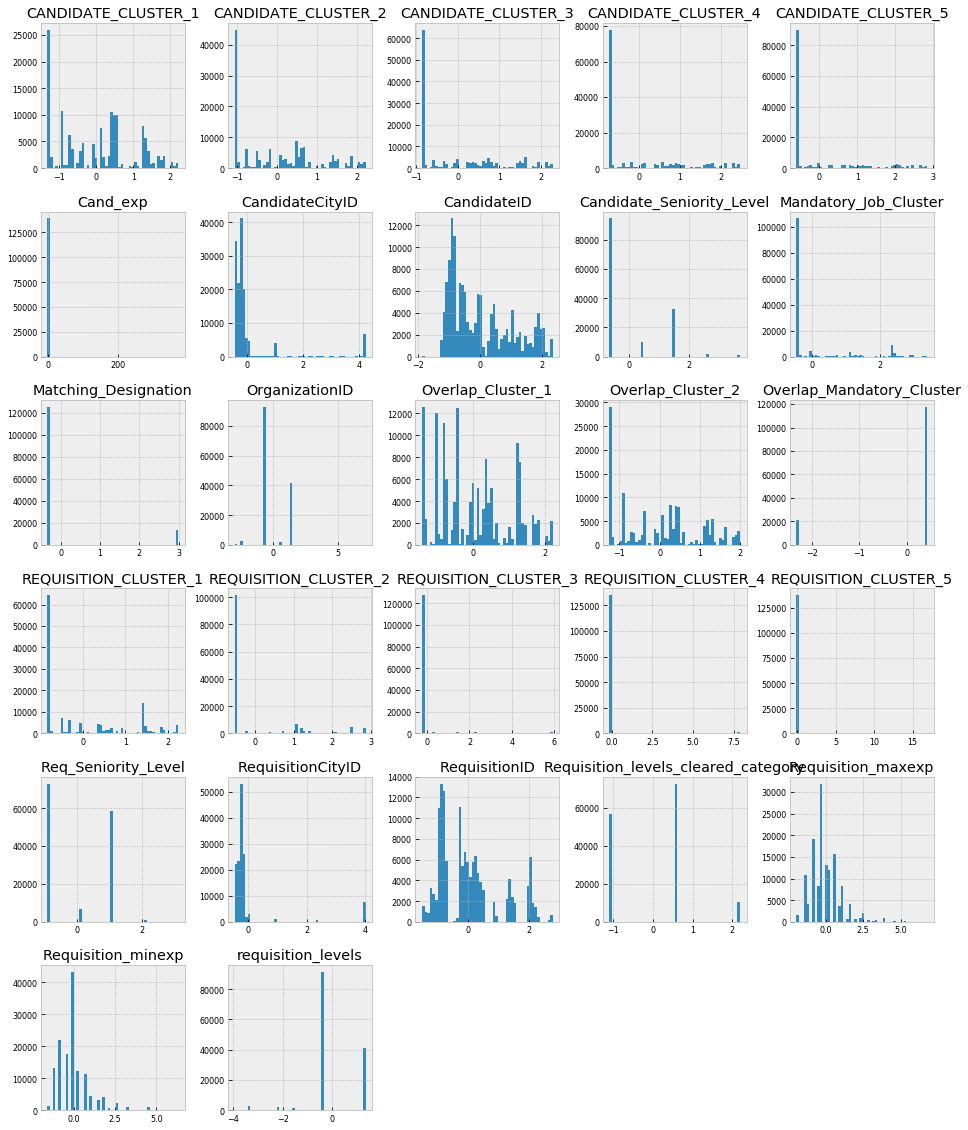

In [66]:
scaled_X_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Scaling our data

In [23]:
# train.groupby(train[columns[1]]).sum()
scaler = StandardScaler()
# # X = train.drop(columns[25], inplace = False, axis = 1)
# # y = train['Requisition_levels_cleared_category']
scaler.fit(X_train)
scaled_train = scaler.fit_transform(X_train)

In [24]:
# pd.DataFrame(scaled_train, columns = columns)#.corr(method = 'kendall')['Requisition_levels_cleared_category']

In [25]:
X_train.corr(method = 'kendall')['Requisition_levels_cleared_category']

REQUISITION_CLUSTER_1                 -0.010703
REQUISITION_CLUSTER_2                 -0.008100
REQUISITION_CLUSTER_3                  0.000218
REQUISITION_CLUSTER_4                  0.009595
REQUISITION_CLUSTER_5                  0.017821
Matching_Designation                   0.377719
Mandatory_Job_Cluster                 -0.003289
Overlap_Mandatory_Cluster              0.134993
Overlap_Cluster_1                      0.014027
Overlap_Cluster_2                     -0.008200
CANDIDATE_CLUSTER_1                    0.000740
CANDIDATE_CLUSTER_2                    0.003730
CANDIDATE_CLUSTER_3                    0.011174
CANDIDATE_CLUSTER_4                    0.009437
CANDIDATE_CLUSTER_5                    0.013244
RequisitionID                         -0.022847
CandidateID                           -0.107266
requisition_levels                     0.061300
Requisition_minexp                    -0.019527
Requisition_maxexp                    -0.033855
OrganizationID                         0

In [26]:
# # Create correlation matrix
corr_matrix = X_train.corr(method='kendall').abs()

# Pairs of highly correlated features
indices = np.where(corr_matrix > 0.8)
indices = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

In [27]:
indices

[('requisition_levels', 'OrganizationID'),
 ('Requisition_minexp', 'Requisition_maxexp')]

## Multinomial Logistic Regression

In [75]:
mlr = linear_model.LogisticRegression(multi_class = 'multinomial', solver='newton-cg', max_iter=200)
mlr.fit(X_train, y_train)

print "Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mlr.predict(X_train))
print "Multinomial Logistic regression CV Accuracy :: ", metrics.accuracy_score(y_val, mlr.predict(X_val))
 
predictions = mlr.predict(X_test)
print "Multinomial Logistic regression test Accuracy :: ", metrics.accuracy_score(y_test, predictions)

Multinomial Logistic regression Train Accuracy ::  0.9915342546478955
Multinomial Logistic regression CV Accuracy ::  0.9917428423594343
Multinomial Logistic regression test Accuracy ::  0.9925405312176613


In [76]:
# With scaled data
# p = scaler.fit(X_train)
# scaled_X_train = 
scaler1 = StandardScaler()
scaled_X_train = scaler1.fit(X_train)
scaled_X_train = pd.DataFrame(data = scaler1.transform(X_train), columns = columns)
scaled_X_val = pd.DataFrame(data = scaler1.fit_transform(X_val), columns = columns)
scaled_X_test = pd.DataFrame(data = scaler1.fit_transform(X_test), columns = columns)

mlr = linear_model.LogisticRegression(multi_class = 'multinomial', solver='newton-cg', max_iter=200)
mlr.fit(scaled_X_train, y_train)
print "Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(y_train, mlr.predict(scaled_X_train))
print "Multinomial Logistic regression CV Accuracy :: ", metrics.accuracy_score(y_val, mlr.predict(scaled_X_val))

predictions = mlr.predict(scaled_X_test)
print "Multinomial Logistic regression test Accuracy :: ", metrics.accuracy_score(y_test, predictions)

Multinomial Logistic regression Train Accuracy ::  1.0
Multinomial Logistic regression CV Accuracy ::  1.0
Multinomial Logistic regression test Accuracy ::  1.0


In [30]:
# mse = np.mean((predicted-expected)**2)
print mlr.intercept_, mlr.coef_,  
# print(model.score(dataset.data, dataset.target))

[ 2.75595194  6.05810047 -8.81405241] [[ 1.70992982e-02  1.77006786e-03 -1.77150191e-02 -1.60717563e-02
  -2.71159481e-03 -4.58847078e-01 -1.06623858e-01 -1.51895538e-01
  -1.54758952e-02  3.55742110e-03  7.06469691e-03 -2.99220766e-03
  -4.89418560e-03  1.05539548e-03  6.51837158e-03 -2.54840893e-02
   1.06282331e-01 -2.45293618e-02 -1.31506885e-02  3.93044815e-02
  -4.91602438e-03  4.02828456e-02 -2.83829991e-03 -1.65920718e-02
  -1.06472763e+01  5.12981352e-02  6.31294030e-03]
 [ 6.09137036e-04  1.49621283e-02  1.43808242e-02  1.87330160e-02
  -2.22688230e-02  5.74799886e-02  5.50971044e-02  9.17673299e-02
  -2.64940011e-03  1.36731679e-03 -2.33610593e-02 -3.63270144e-02
  -2.37231794e-02 -2.08791080e-02 -3.51562670e-02  3.25434222e-02
  -7.69850386e-03  2.07480724e-01 -5.46711282e-02  4.44576538e-02
  -2.43331694e-01  5.24588504e-02  5.40991530e-03  4.86670826e-02
   4.22746793e-01  1.58936102e-02  1.09708717e-02]
 [-1.77084353e-02 -1.67321962e-02  3.33419489e-03 -2.66125978e-03
  

## SVM

In [72]:
from sklearn import svm
svc = svm.SVC()
svc.fit(scaled_X_train, y_train)

print "SVC Train Accuracy :: ", metrics.accuracy_score(y_train, svc.predict(scaled_X_train))
print "SVC CV Accuracy :: ", metrics.accuracy_score(y_val, svc.predict(scaled_X_val))

predictions = svc.predict(scaled_X_test)
print "SVC test Accuracy :: ", metrics.accuracy_score(y_test, predictions)

SVC Train Accuracy ::  0.9999928134589541
SVC CV Accuracy ::  0.9998706450500172
SVC test Accuracy ::  0.9998490858916868


### Naive Bayes

In [73]:
# Bernoulli - for boolean/binary data
# Multinomial - didn't allow negative values
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB()
mnb.fit(scaled_X_train, y_train)

print "Naive Bayes Train Accuracy :: ", metrics.accuracy_score(y_train, mnb.predict(scaled_X_train))
print "Naive Bayes CV Accuracy :: ", metrics.accuracy_score(y_val, mnb.predict(scaled_X_val))

predictions = mnb.predict(scaled_X_test)
print "Naive Bayes test Accuracy :: ", metrics.accuracy_score(y_test, predictions)

Naive Bayes Train Accuracy ::  1.0
Naive Bayes CV Accuracy ::  0.9999784408416695
Naive Bayes test Accuracy ::  0.9999784408416695


### Decision Trees

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(scaled_X_train, y_train)

print "Decision Trees Train Accuracy :: ", metrics.accuracy_score(y_train, dtc.predict(scaled_X_train))
print "Decision Trees CV Accuracy :: ", metrics.accuracy_score(y_val, dtc.predict(scaled_X_val))

predictions = dtc.predict(scaled_X_test)
print "Decision Trees test Accuracy :: ", metrics.accuracy_score(y_test, predictions)

Decision Trees Train Accuracy ::  1.0
Decision Trees CV Accuracy ::  1.0
Decision Trees test Accuracy ::  1.0


### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, leaf_size = 100, p=1)
knn.fit(X_train, y_train) 

print "KNN Train Accuracy :: ", metrics.accuracy_score(y_train, knn.predict(scaled_X_train))
print "KNN CV Accuracy :: ", metrics.accuracy_score(y_val, knn.predict(scaled_X_val))

predictions = knn.predict(scaled_X_test)
print "KNN test Accuracy :: ", metrics.accuracy_score(y_test, predictions)

Multinomial Logistic regression Train Accuracy ::  0.5208445623037176
Multinomial Logistic regression CV Accuracy ::  0.519834425664022
Multinomial Logistic regression test Accuracy ::  0.5253104518799586


### Neural Network

In [63]:
import os
seed = 9
rng = np.random.RandomState(seed)

# import tensorflow as tf
'''
helper functions
'''
# def batch_creator(batch_size, dataset_length, dataset_name, labels):
#     """Create batch with random samples and return appropriate format"""
#     batch_mask = rng.choice(dataset_length, batch_size)
    
#     batch_x = eval('X_' + dataset_name )[[batch_mask]].reshape(-1, input_num_units)
# #     batch_x = preproc(batch_x)
    
#     if dataset_name == 'train':
#         batch_y = eval(dataset_name).ix[batch_mask, 'Requisition_levels_cleared_category'].values
#         batch_y = dense_to_one_hot(batch_y)
        
#     return batch_x, batch_y

def next_batch(num, dataset, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = dataset.index.values
#     idx = np.arange(0 , len(data))
#     np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [dataset.loc[i] for i in idx]#[data[ i] for i in idx]
    labels_shuffle = [labels.loc[ i] for i in idx]
    labels_shuffle = dense_to_one_hot(np.asarray(labels_shuffle))
#     labels_shuffle = np.asarray(labels_shuffle.values.reshape(len(labels_shuffle), 1))
#     i = rng.choice(len(dataset), batch_size, replace=False)
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def dense_to_one_hot(labels_dense, num_classes=3):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot
'''
end of helper functions
'''


input_num_units = X_train.shape[1]
hidden_num_units = 20
output_num_units = 3

# define placeholders
x = tf.placeholder(tf.float32, [None, input_num_units])
y = tf.placeholder(tf.float32, [None, output_num_units])

# set remaining variables
epochs = 5
batch_size = 15461
learning_rate = 0.01

weights = {
    'hidden': tf.Variable(tf.random_normal([input_num_units, hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([hidden_num_units, output_num_units], seed=seed))
}

biases = {
    'hidden': tf.Variable(tf.random_normal([hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([output_num_units], seed=seed))
}

# the computational graph
hidden_layer = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
hidden_layer = tf.nn.relu(hidden_layer)

output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.initialize_all_variables()

with tf.Session() as sess:
    # create initialized variables
    sess.run(init)
    
    ### for each epoch, do:
    ###   for each batch, do:
    ###     create pre-processed batch
    ###     run optimizer by feeding batch
    ###     find cost and reiterate to minimize
    
    for epoch in range(epochs):
        avg_cost = 0
        total_batch = int(X_train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = next_batch(batch_size, X_train, y_train)
            _, c = sess.run([optimizer, cost], feed_dict = {x: batch_x, y: batch_y})
            
            avg_cost += c / total_batch
            
        print "Epoch:", (epoch+1), "cost =", "{:.5f}".format(avg_cost)
    
    print "\nTraining complete!"
    
    
    # find predictions on val set
    pred_temp = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(pred_temp, "float"))
    print "Validation Accuracy:", accuracy.eval({x: np.asarray(X_val).reshape(-1, input_num_units), y: dense_to_one_hot(np.asarray(y_val))})
    
    predict = tf.argmax(output_layer, 1)
    pred = predict.eval({x: np.asarray(X_test).reshape(-1, input_num_units)})
    
    accuracy_test = tf.reduce_mean(tf.cast(pred, "float"))
    print "Test Accuracy:", accuracy_test.eval({x: np.asarray(X_test).reshape(-1, input_num_units), y: dense_to_one_hot(np.asarray(y_test))})
    


 Epoch: 1 cost = 273834.63889
Epoch: 2 cost = 91766.89062
Epoch: 3 cost = 68779.37066
Epoch: 4 cost = 50955.43490
Epoch: 5 cost = 30724.76172

Training complete!
Validation Accuracy: 0.518045
Test Accuracy: 1.7777467


#TODO : Test accuracy is wrong. This network should be checked again for flaws

### After testing all the models, its safe to use logistic regression or svm as the final model. We can also use bagging and boosting techniques to combine the results of several classifiers.